In [36]:
# import pandas as pd
# from sklearn.linear_model import LinearRegression
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import mean_squared_error, r2_score
# from datetime import datetime
# import numpy as np

# # Step 1: Data collection
# # http://www.howstat.com/cricket/Statistics/Players/PlayerProgressSummary_ODI.asp?PlayerID=3474
# data = pd.read_csv('player_data.csv')

# # Step 2: Data preprocessing
# # X = data[['Match No', 'Versus', 'Ground']] # features
# X = data[['Versus', 'Ground', 'Age']] # features
# y = data['Batting Runs'] # target variable
# # X['Date'] = pd.to_datetime(X['Date']) # convert date strings to datetime format
# # X['Date'] = datetime.strptime(X['Date'], '%d/%m/%Y')


# X = pd.get_dummies(X, columns=['Versus', 'Ground']) # one-hot encode categorical features
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0) # split into training and test sets

# # Step 3: Feature selection
# # You can use techniques like correlation analysis, recursive feature elimination, or principal component analysis to select relevant features

# # Step 4: Model training
# lr = LinearRegression()
# lr.fit(X_train, y_train)

# # Step 5: Model evaluation
# y_pred = lr.predict(X_test)
# mse = mean_squared_error(y_test, y_pred)
# rmse = np.sqrt(mse)
# r2 = r2_score(y_test, y_pred)
# print(f'Mean squared error: {mse:.2f}')
# print(f'Root mean squared error: {rmse:.2f}')
# print(f'R-squared: {r2:.2f}')

# # # Step 6: Prediction
# next_match = pd.DataFrame({
#     'Match No': [data['Match No'].max() + 1],
#     'Versus': ['Australia'],
#     'Ground': ['Sydney Cricket Ground'],
#     'Age': [12520]
# })
# # print(next_match)
# # next_match = pd.get_dummies(next_match, columns=['Versus', 'Ground']) # one-hot encode categorical features
# # print(next_match)
# # next_match_pred = lr.predict(next_match)
# # print(f'Predicted score for next match: {next_match_pred[0]:.2f}')


Mean squared error: 2180092333003719168.00
Root mean squared error: 1476513573.59
R-squared: -1287880359718156.25


In [4]:
import pandas as pd
df = pd.read_csv('player_data.csv')
# shows top 10 rows
df.head(100)


,Match No,Innings No,Date,Versus,Ground,Batting Runs,Batting Aggr,Batting Avg,Bowling Wkts,Bowling Aggr,Bowling Avg,Fielding Catches,Fielding Agg,Keeping Catches,Keeping Stumps,Keeping Agg,AgeYr,AgeDays,Age,Unnamed: 19
0,1,1.0,39678.0,Sri Lanka,Rangiri Dambulla International Stadium,12.0,12,12.00,NaN,0,NaN,NaN,0,NaN,NaN,NaN,19,287,7222,NaN
1,2,2.0,39680.0,Sri Lanka,Rangiri Dambulla International Stadium,37.0,49,24.50,NaN,0,NaN,3.0,3,NaN,NaN,NaN,19,289,7224,NaN
2,3,3.0,39684.0,Sri Lanka,R Premadasa Stadium,25.0,74,24.67,NaN,0,NaN,NaN,3,NaN,NaN,NaN,19,293,7228,NaN
3,4,4.0,39687.0,Sri Lanka,R Premadasa Stadium,54.0,128,32.00,NaN,0,NaN,NaN,3,NaN,NaN,NaN,19,296,7231,NaN
4,5,5.0,39689.0,Sri Lanka,R Premadasa Stadium,31.0,159,31.80,NaN,0,NaN,NaN,3,NaN,NaN,NaN,19,298,7233,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,93.0,41293.0,England,JSCA International Stadium Complex,77.0,4028,50.35,NaN,2,153.0,NaN,50,NaN,NaN,NaN,24,75,8835,NaN
96,97,94.0,41297.0,England,Punjab Cricket Association IS Bindra Stadium,26.0,4054,50.05,NaN,2,153.0,NaN,50,NaN,NaN,NaN,24,79,8839,NaN
97,98,95.0,41301.0,England,Himachal Pradesh Cricket Association Stadium,0.0,4054,49.44,NaN,2,153.0,NaN,50,NaN,NaN,NaN,24,83,8843,NaN
98,99,96.0,41431.0,South Africa,Sophia Gardens,31.0,4085,49.22,NaN,2,153.0,NaN,50,NaN,NaN,NaN,24,213,8973,NaN


In [5]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay

# Step 1: Data collection
# http://www.howstat.com/cricket/Statistics/Players/PlayerProgressSummary_ODI.asp?PlayerID=3474
data = pd.read_csv('player_data.csv')

# Step 2: Data preprocessing
X = data[['Versus', 'Ground', 'Age']] # features
y = data['Batting Runs'] # target variable
X = pd.get_dummies(X, columns=['Versus', 'Ground']) # one-hot encode categorical features
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0) # split into training and test sets

# Step 3: Feature selection
# You can use techniques like correlation analysis, recursive feature elimination, or principal component analysis to select relevant features

# Step 4: Model training
rf = RandomForestRegressor(n_estimators=100, random_state=0)
rf.fit(X_train, y_train)


# Step 5: Model evaluation
y_pred = rf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
# print(f'Mean squared error: {mse:.2f}')
# print(f'Root mean squared error: {rmse:.2f}')
# print(f'R-squared: {r2:.2f}')

# accuracy = accuracy_score(y_test, y_pred)
# print("Accuracy:", accuracy)

# # # # Step 6: Prediction
next_match = pd.DataFrame({
    'Versus': ['Australia'],
    'Ground': ['Sydney Cricket Ground'],
    'Age': [12520]
})

# One-hot encode categorical features in next_match
next_match = pd.get_dummies(next_match, columns=['Versus', 'Ground']) 
# Add missing columns to next_match (since not all values were present in X_train)
missing_cols = set(X_train.columns) - set(next_match.columns)
for col in missing_cols:
    next_match[col] = 0
next_match = next_match[X_train.columns] # Reorder columns to match X_train

# Predict batting score for next match
next_match_pred = rf.predict(next_match)
print(f'Predicted score for next match: {next_match_pred[0]:.2f}')


Predicted score for next match: 39.80


In [7]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay

# Step 1: Data collection
# http://www.howstat.com/cricket/Statistics/Players/PlayerProgressSummary_ODI.asp?PlayerID=3474
data = pd.read_csv('player_data.csv')

# Step 2: Data preprocessing
X = data[['Versus', 'Ground', 'Age']] # features
y = data['Batting Runs'] # target variable
X = pd.get_dummies(X, columns=['Versus', 'Ground']) # one-hot encode categorical features
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0) 
# split into training and test sets

# Step 3: Feature selection
# You can use techniques like correlation analysis, recursive feature elimination, or 
# principal component analysis to select relevant features

# Step 4: Model training
rf = RandomForestRegressor(n_estimators=100, random_state=0)
rf.fit(X_train, y_train)

# Step 5: Model evaluation
y_pred = rf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# # # # Step 6: Prediction
next_match = pd.DataFrame({
    'Versus': ['Sri Lanka'],
    'Ground': ['R Premadasa Stadium'],
    'Age': [12520]
})

# One-hot encode categorical features in next_match
next_match = pd.get_dummies(next_match, columns=['Versus', 'Ground']) 
# Add missing columns to next_match (since not all values were present in X_train)
missing_cols = set(X_train.columns) - set(next_match.columns)
for col in missing_cols:
    next_match[col] = 0
next_match = next_match[X_train.columns] # Reorder columns to match X_train

# Predict batting score for next match
next_match_pred = rf.predict(next_match)
print(f'Predicted score for next match: {next_match_pred[0]:.2f}')

Predicted score for next match: 60.72


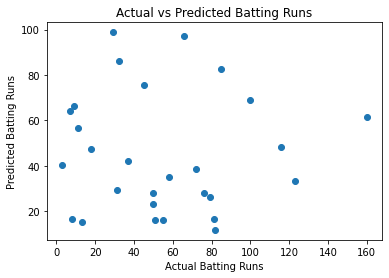

In [8]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel('Actual Batting Runs')
plt.ylabel('Predicted Batting Runs')
plt.title('Actual vs Predicted Batting Runs')
plt.show()


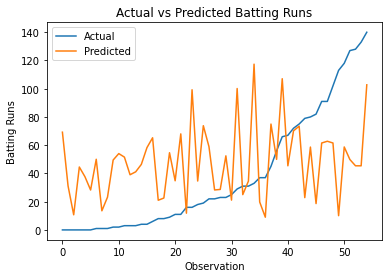

In [60]:
import matplotlib.pyplot as plt

# Sort y_test and y_pred by increasing order of y_test
sorted_idx = y_test.argsort()
y_test_sorted = y_test.iloc[sorted_idx]
y_pred_sorted = y_pred[sorted_idx]

# Create line plot of actual vs predicted values
plt.plot(range(len(y_test)), y_test_sorted, label='Actual')
plt.plot(range(len(y_pred)), y_pred_sorted, label='Predicted')
plt.xlabel('Observation')
plt.ylabel('Batting Runs')
plt.title('Actual vs Predicted Batting Runs')
plt.legend()
plt.show()


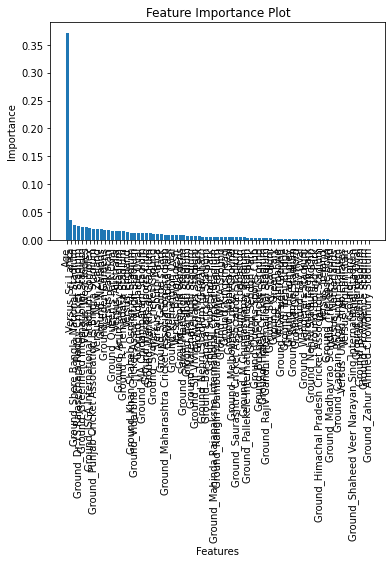

In [61]:
import matplotlib.pyplot as plt

# Get feature importances from the model
importances = rf.feature_importances_

# Get feature names from X_train
feature_names = X_train.columns

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Create feature importance plot
plt.bar(range(X_train.shape[1]), importances[indices])
plt.xticks(range(X_train.shape[1]), feature_names[indices], rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance Plot')
plt.show()


In [63]:
pip install pydotplus


     |████████████████████████████████| 278 kB 4.3 MB/s eta 0:00:01
  Created wheel for pydotplus: filename=pydotplus-2.0.2-py3-none-any.whl size=24566 sha256=5acaff91117d10d0cdb5b8e7b55088df6a31d761940d79f7b4aa65ab685bdd75
  Stored in directory: /Users/jaspreetsingh/Library/Caches/pip/wheels/fe/cd/78/a7e873cc049759194f8271f780640cf96b35e5a48bef0e2f36
Successfully built pydotplus
Note: you may need to restart the kernel to use updated packages.


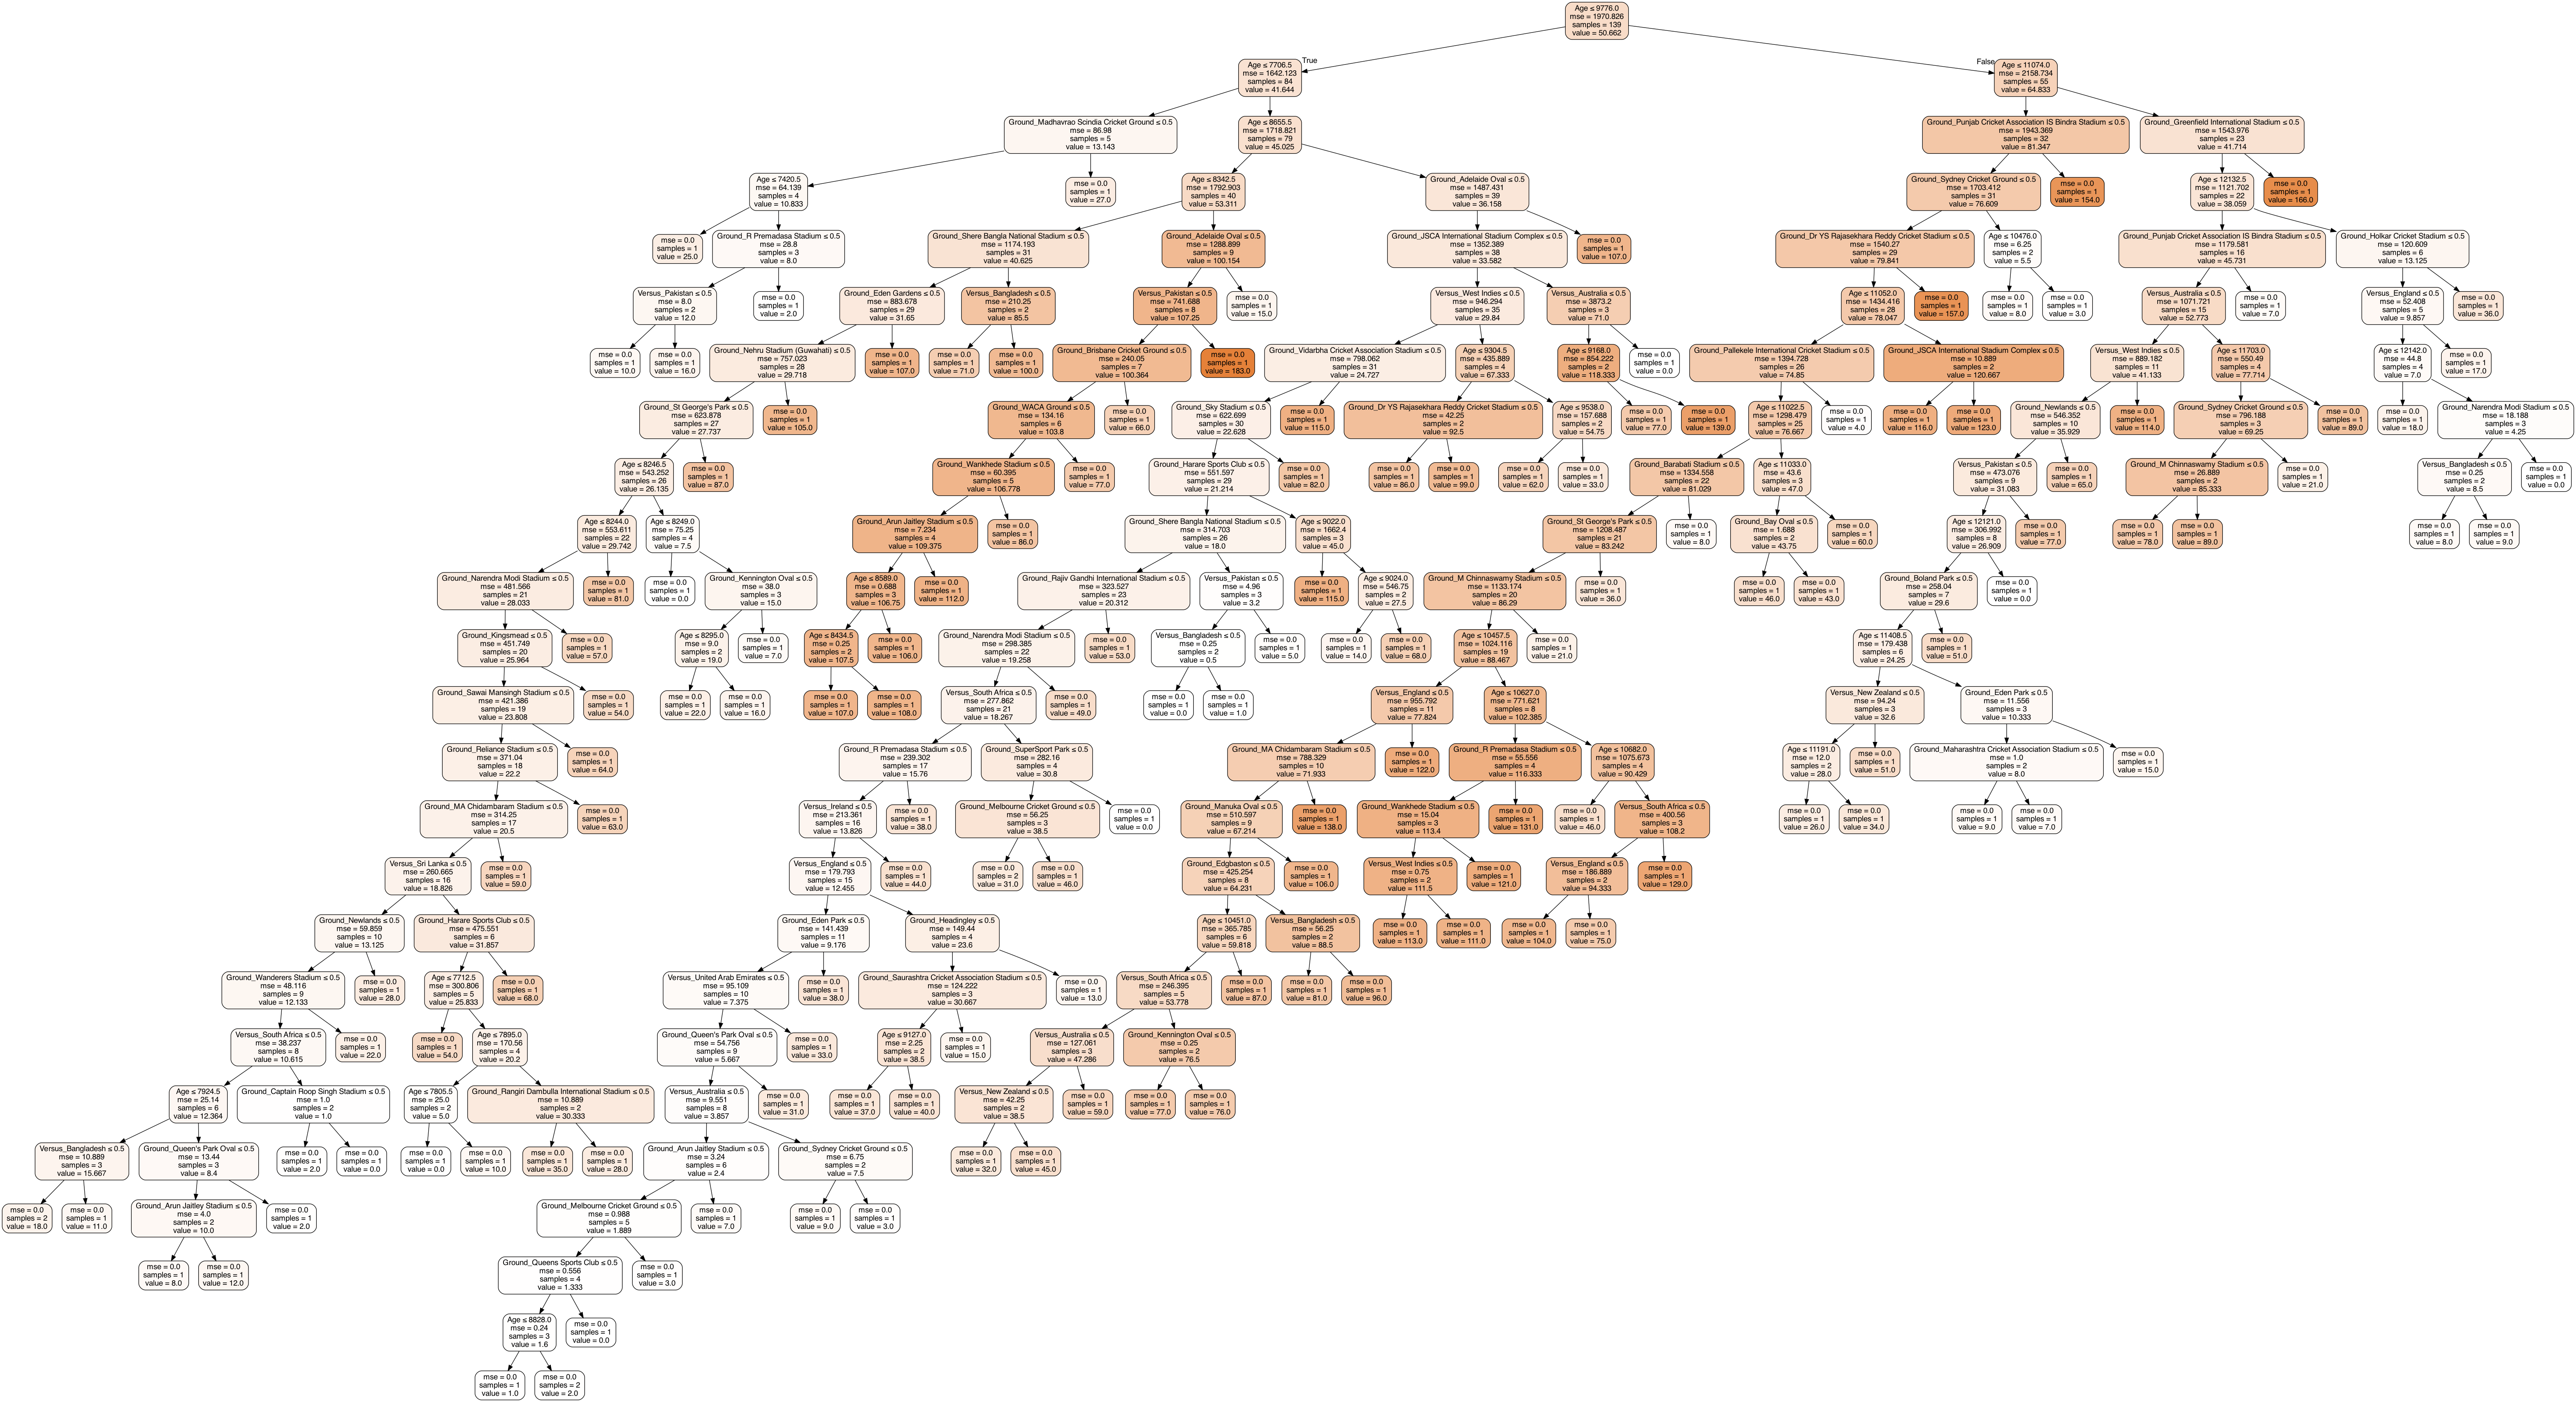

In [64]:
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image

# Select a tree from the random forest
tree = rf.estimators_[0]

# Export the tree as a DOT file
dot_data = export_graphviz(tree, out_file=None,
                           feature_names=X_train.columns,
                           filled=True, rounded=True,
                           special_characters=True)

# Convert the DOT file to a graph using Graphviz
graph = pydotplus.graph_from_dot_data(dot_data)

# Display the graph
Image(graph.create_png())


In [24]:
# import pandas as pd
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import mean_squared_error, r2_score
# import numpy as np
# from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay

# # Step 1: Data collection
# # http://www.howstat.com/cricket/Statistics/Players/PlayerProgressSummary_ODI.asp?PlayerID=3474
# data = pd.read_csv('player_data.csv')

# # Step 2: Data preprocessing
# X = data[['Versus', 'Ground', 'Age']] # features
# y = data['Batting Runs'] # target variable
# X = pd.get_dummies(X, columns=['Versus', 'Ground']) # one-hot encode categorical features
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0) # split into training and test sets

# # Step 3: Feature selection
# # You can use techniques like correlation analysis, recursive feature elimination, or principal component analysis to select relevant features

# # Step 4: Model training
# rf = RandomForestRegressor(n_estimators=100, random_state=0)
# rf.fit(X_train, y_train)


# # Step 5: Model evaluation
# y_pred = rf.predict(X_test)
# mse = mean_squared_error(y_test, y_pred)
# rmse = np.sqrt(mse)
# r2 = r2_score(y_test, y_pred)
# print(f'Mean squared error: {mse:.2f}')
# print(f'Root mean squared error: {rmse:.2f}')
# print(f'R-squared: {r2:.2f}')

# # accuracy = accuracy_score(y_test, y_pred)
# # print("Accuracy:", accuracy)

# # # # # Step 6: Prediction
# next_match = pd.DataFrame({
#     'Versus': ['Australia'],
#     'Ground': ['Sydney Cricket Ground'],
#     'Age': [12520]
# })
# # next_match = pd.get_dummies(next_match, columns=['Versus', 'Ground']) # one-hot encode categorical features
# # next_match_pred = rf.predict(next_match)
# # print(f'Predicted score for next match: {next_match_pred[0]:.2f}')

# # One-hot encode categorical features in next_match
# next_match = pd.get_dummies(next_match, columns=['Versus', 'Ground']) 
# # Add missing columns to next_match (since not all values were present in X_train)
# missing_cols = set(X_train.columns) - set(next_match.columns)
# for col in missing_cols:
#     next_match[col] = 0
# next_match = next_match[X_train.columns] # Reorder columns to match X_train

# # Predict batting score for next match
# next_match_pred = rf.predict(next_match)
# print(f'Predicted score for next match: {next_match_pred[0]:.2f}')


Mean squared error: 2411.41
Root mean squared error: 49.11
R-squared: -0.42
Predicted score for next match: 38.29


                   Age  Batting Runs
Age           1.000000      0.114791
Batting Runs  0.114791      1.000000


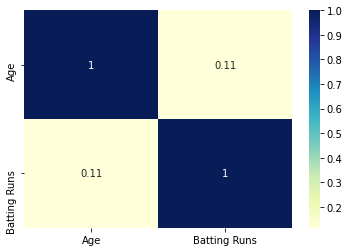

In [9]:
# import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Read the data into a pandas dataframe
# data = pd.read_csv('player_data.csv')

# # Calculate the correlation coefficients between the features
# corr = data[['Versus', 'Ground', 'Age','Batting Runs']].corr()

# print(corr)

# # Create a heatmap of the correlation matrix using Seaborn
# sns.heatmap(corr, annot=True, cmap='YlGnBu')

# # Show the plot
# plt.show()
